# PRACTICA 1 #

## Compresion de Rango Dinamico

Implementar la compresión del rango dinámico: sean *r* el nivel de gris de la imagen de entrada y *s* el nivel de gris de la imagen de salida, tal que $s = f(r), r ∈ [0,R]$. Entonces la función de compresión del rango dinámico es $f(r) = c · log(r + 1)$, eligiendo *c* de manera tal que $f (r) \in [0, 255].$


In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib as mpl

### Imagen inicial

Nota: Necesito una imagen oscura para poder aprovechar la compresion de rango dinamico. 
Particularmente para valores de pixeles menores a 1, asi aprovechamos el log. ¿Es grayscale de PIL un arreglo de punto flotante? ¿Porque si voy de $[0,1,2,3...255]$ no voy a poder aprovechar esta función.

[[ 22  30  32 ... 238 238 238]
 [ 38  26  39 ... 238 238 238]
 [ 35  21  43 ... 238 238 238]
 ...
 [ 31  31  29 ...  30  30  30]
 [ 31  31  29 ...  30  30  30]
 [ 31  31  29 ...  30  30  30]]


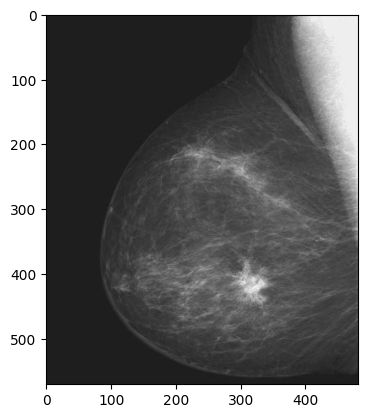

In [72]:
imagen = Image.open("1_Introduccion/imagenes_contraste/manografia.jpg")
imagen = imagen.convert("L")
array_imagen = np.array(imagen)
print(array_imagen)
plt.imshow(array_imagen,cmap='gray', vmin=0, vmax=255)

In [59]:
def compresion_rango(imagen,c):
    imagen_comp = np.log(imagen + 1) * c
    plt.imshow(imagen_comp, cmap='gray', vmin=0, vmax=255)

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

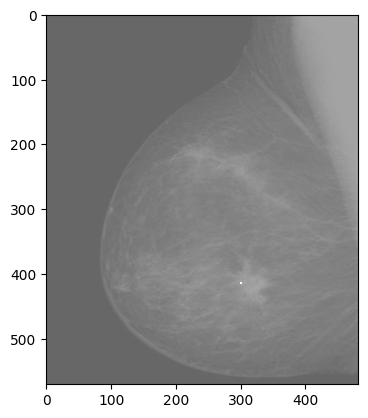

In [71]:
#compresion_rango(np.array,int)
np.seterr(divide = 'ignore') #usamos esto porque da warning de division por 0.
compresion_rango(array_imagen, 30)
np.seterr(divide = 'warn') 

## Imagen negativa

2. Implementar una función que devuelva el negativo de una imagen.

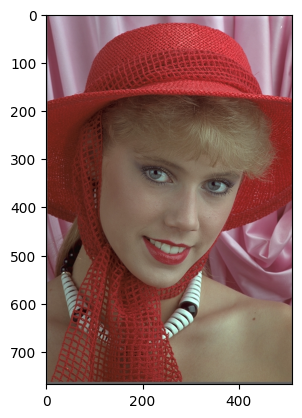

In [5]:
imagen_positiva_PIL = Image.open("1_Introduccion/imagenes1/kodim04.png")
img_pos = np.array(imagen_positiva_PIL)
plt.imshow(img_pos,cmap='gray', vmin=0, vmax=255)

In [82]:
def negativa(imagen):
    imagen_negativa = np.array(255 - img_pos)
    plt.imshow(imagen_negativa,cmap='gray', vmin=0, vmax=255)

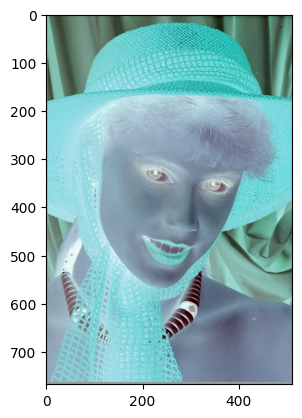

In [83]:
# negativa(np.array)
negativa(img_pos)

## Histograma de niveles de gris

Implementar una función que devuelva el histograma de niveles de gris de una imagen.

In [8]:
def histograma(imagen):
    imagen = imagen.convert("L")  # Convertimos imagen a Grayscale
    imagen = np.array(imagen)  # Convertimos PIL.Image a NP.ARRAY

    # Creamos una figura con 2 subplots
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))

    # Primer subplot: Imagen original (escala de grises)
    axs[0].imshow(imagen, cmap='gray')  # Imprimimos imagen
    axs[0].set_title('Imagen - Grayscale')
    axs[0].axis('scaled')  # Maintain aspect ratio
    axs[0].axis('off')  # Para ocultar los ticks

    # Segundo subplot: Histograma
    hist, bin_edges = np.histogram(imagen.ravel(), 256, [0, 255])
    axs[1].plot(hist)
    axs[1].set_xlim([0, 255])
    axs[1].set_title('Histograma')
    axs[1].set_xlabel('Valor de Pixel')
    axs[1].set_ylabel('Frecuencia')

    plt.tight_layout()
    plt.show()

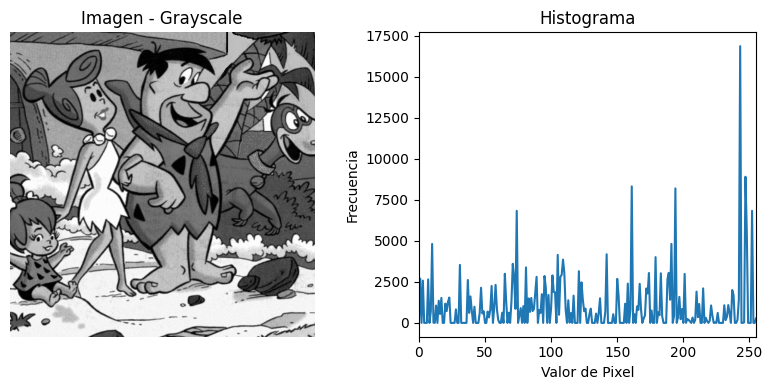

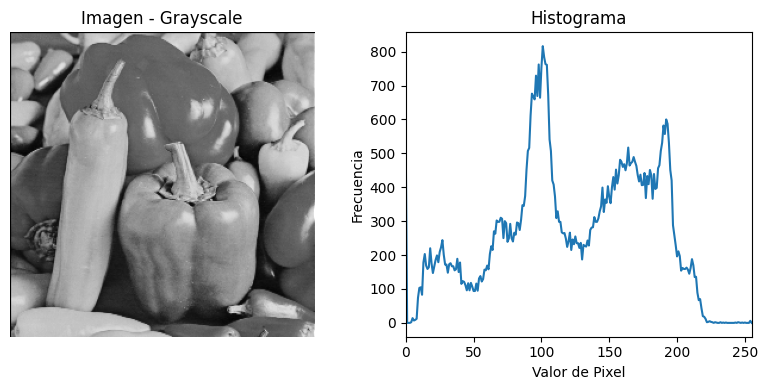

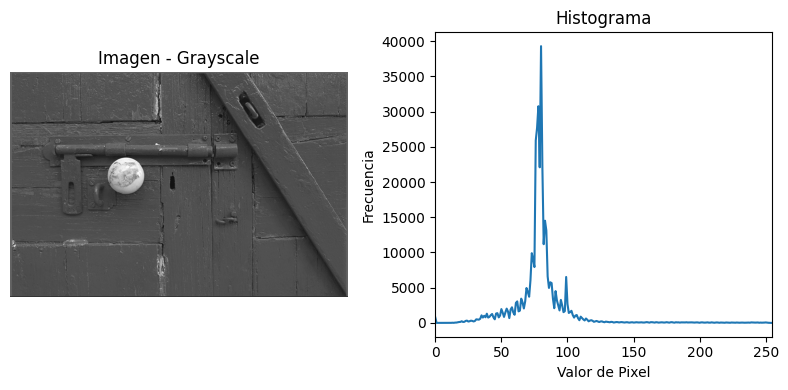

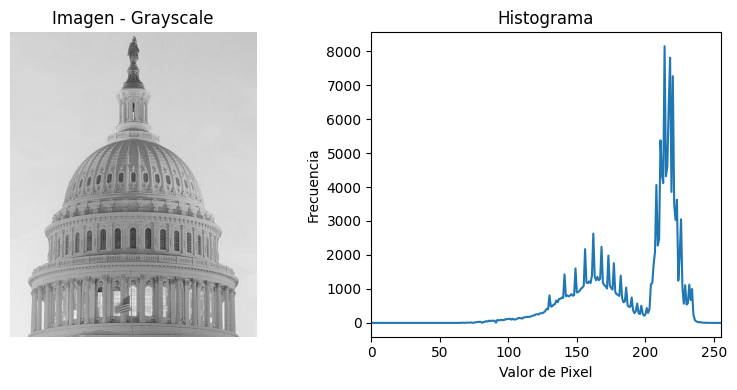

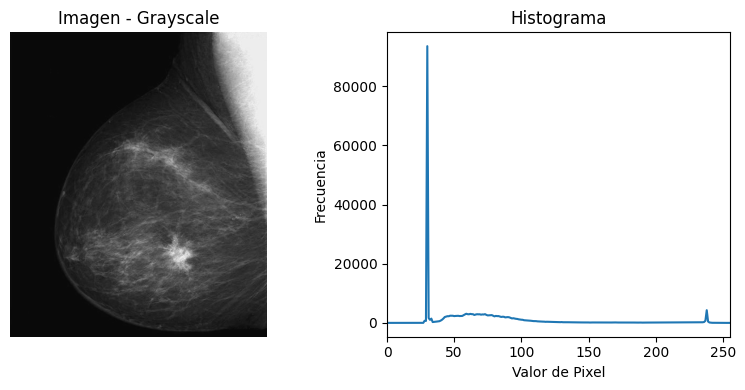

In [9]:
flintstones = Image.open("1_Introduccion/imagenes_test01/flinstones.png")
peppers = Image.open("1_Introduccion/imagenes_test01/peppers256.png")
door = Image.open("1_Introduccion/imagenes1/kodim02.png")
cupula = Image.open("1_Introduccion/imagenes_contraste/cupula.jpg")
mamografia = Image.open("1_Introduccion/imagenes_contraste/manografia.jpg")

#histograma recibe argumento de tipo PIL.Image
histograma(flintstones)
histograma(peppers)
histograma(door)
histograma(cupula)
histograma(mamografia)

### Aumento de contraste
Examinando el histograma, implementar una función que devuelva una imagen que tenga aumento del contraste.

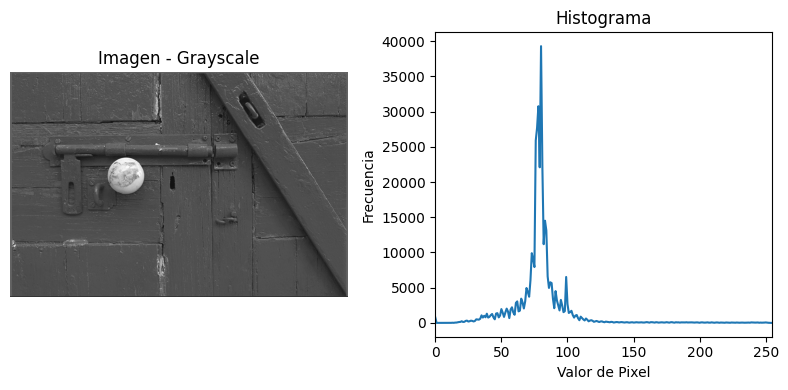

In [10]:
histograma(door)

In [24]:
def histograma_np(imagen):
    # Creamos una figura con 2 subplots
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))

    # Primer subplot: Imagen original (escala de grises)
    axs[0].imshow(imagen, cmap='gray')  # Imprimimos imagen
    axs[0].set_title('Imagen - Grayscale')
    axs[0].axis('scaled')  # Maintain aspect ratio
    axs[0].axis('off')  # Para ocultar los ticks

    # Segundo subplot: Histograma
    hist, bin_edges = np.histogram(imagen.ravel(), 256, [0, 255])
    axs[1].plot(hist)
    axs[1].set_xlim([0, 255])
    axs[1].set_title('Histograma')
    axs[1].set_xlabel('Valor de Pixel')
    axs[1].set_ylabel('Frecuencia')

    plt.tight_layout()
    plt.show()

In [43]:
def aumento_contraste(imagen, bajos, altos):
    imagen_contrastada = imagen.convert("L")
    imagen_contrastada = np.array(imagen_contrastada)
    rangos_bajos = imagen_contrastada < bajos
    rangos_altos = imagen_contrastada > altos
    imagen_contrastada[rangos_bajos] = imagen_contrastada[rangos_bajos] / 2
    imagen_contrastada[rangos_altos] = imagen_contrastada[rangos_altos] * 4
    histograma_np(imagen_contrastada)

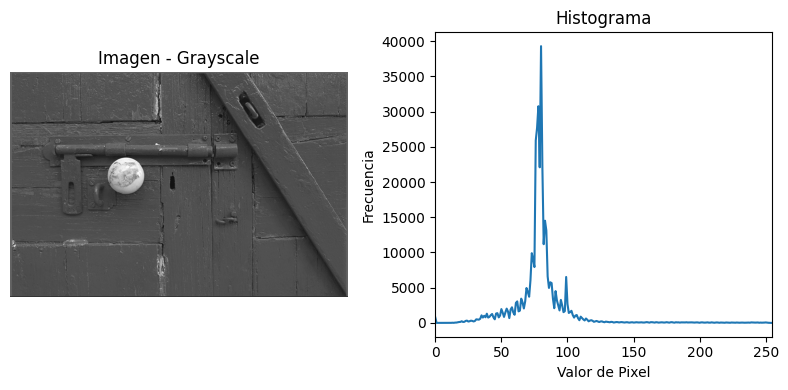

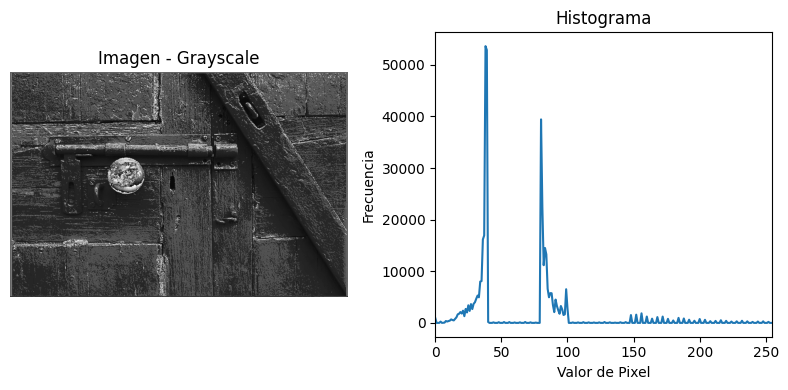

In [42]:
histograma(door)
aumento_contraste(door, 80, 100)

---
### Umbral - Imagen Binaria

Implementar una función que aplique un umbral a una imagen, devolviendo una imagen binaria.

In [44]:
def binaria(imagen, umbral):
    imagen_binaria = imagen.convert("L")
    imagen_binaria = np.array(imagen_binaria)
    bajo_umbral = imagen_binaria < umbral
    sobre_umbral = imagen_binaria >= umbral
    imagen_binaria[bajo_umbral] = 0
    imagen_binaria[sobre_umbral] = 255
    histograma_np(imagen_binaria)


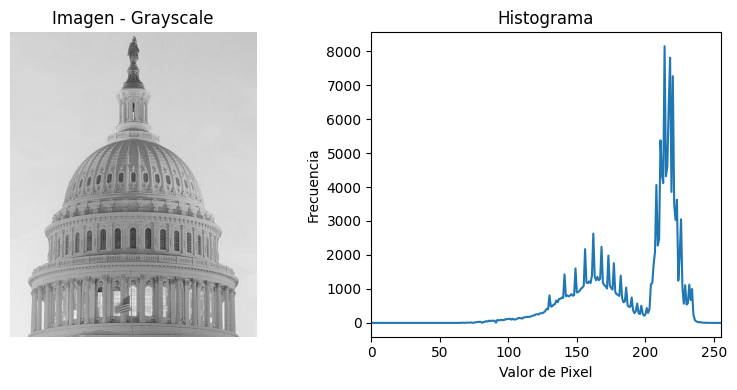

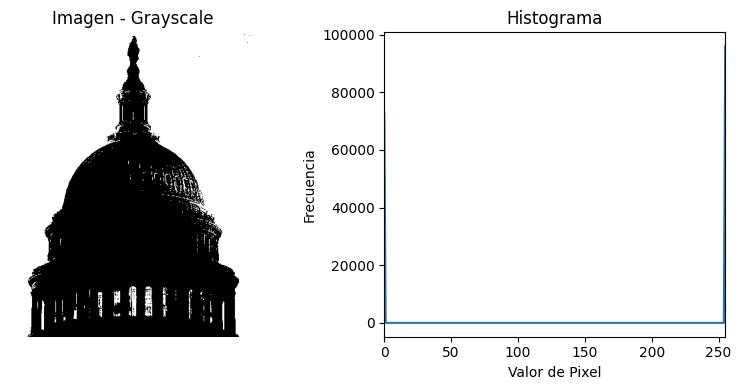

In [53]:
histograma(cupula)
binaria(cupula, 200)